In [8]:
# Harry Chong
# Code 1: Using Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

In [9]:
# Helper Function
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
            
    def fit(self, X, y = None):
        return self # nothing else to do
    
    def transform(self, X):
        # Check if x is a pandas DataFrame
        if not isinstance(X, pd.DataFrame):
            raise KeyError("Input is not a pandas DataFrame")
        return X.drop([self.column], axis=1)

In [10]:
# Retrieve dataset
dataset = pd.read_pickle("appml-assignment1-dataset.pkl")
x_data = pd.DataFrame(dataset["X"])
y_data = pd.DataFrame(dataset["y"])
    
# Create pipeline and preprocess data
# Note: Date column is not needed. I used a custom transformer drop the column.
# I believe we can learn from the implicit pattern between values of each currency.
dataPipeline = Pipeline([
                            ("date_drop", DropColumn("date")), 
                            ("imputer", SimpleImputer(strategy = "median")), 
                            ("std_scaler", StandardScaler())
                        ])

# Create pipeline pkl
pickle.dump(dataPipeline, open("pipeline1.pkl", "wb"))
transformedData = dataPipeline.fit_transform(x_data)

# Split data into training and test sets
x_train, x_test = train_test_split(transformedData, test_size = 0.25, random_state=0)
y_train, y_test = train_test_split(y_data, test_size = 0.25, random_state=0)

# Apply Linear Regression
lin_reg = LinearRegression()

# Fit model and create model pkl
lin_reg.fit(x_train, y_train)
pickle.dump(lin_reg, open("model1.pkl", "wb"))

# Predict for training and test data
y_pred = lin_reg.predict(x_test)

# Calculate MSE and Accuracy
lin_mse = np.sqrt(mean_squared_error(y_test, y_pred))
lin_accuracy = lin_reg.score(x_test, y_test)
print("Linear Regression MSE: {}".format(lin_mse))
print("Linear Regression Accuracy: {}".format(lin_accuracy))

# Append predicted values to test Dataframe
y_test['Predicted'] = y_pred

Linear Regression MSE: 0.0008437429868695878
Linear Regression Accuracy: 0.9999596963274461


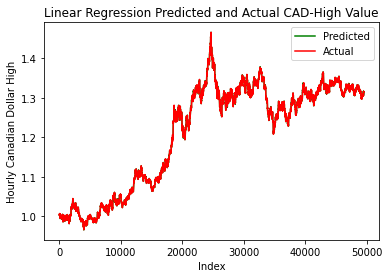

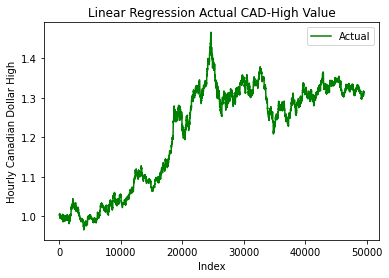

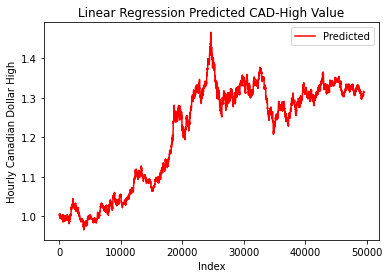

,CAD-high,Predicted
4,1.003150,1.003624
16,1.003575,1.005203
17,1.002550,1.002188
20,1.002250,1.002723
34,1.006175,1.006547
...,...,...
49514,1.316520,1.316374
49523,1.314535,1.315264
49538,1.313275,1.313477
49546,1.315115,1.314601


In [11]:
# Visualization 
# Sort dataframe based on index to plot correctly
sorted_y_test = y_test.sort_index()

index = sorted_y_test.index
predict_data = sorted_y_test["Predicted"]
actual_data = sorted_y_test["CAD-high"]

# Figure 1: Overlap of model predicted and actual value
plt.figure(1)
plt.plot(index, actual_data, color = "green")
plt.plot(index, predict_data, color = "red")
plt.title("Linear Regression Predicted and Actual CAD-High Value")
plt.xlabel("Index")
plt.ylabel("Hourly Canadian Dollar High")
plt.legend(['Predicted', 'Actual'])

# Figure 2: Model actual value
plt.figure(2)
plt.plot(index, actual_data, color = "green")
plt.title("Linear Regression Actual CAD-High Value")
plt.xlabel("Index")
plt.ylabel("Hourly Canadian Dollar High")
plt.legend(['Actual'])

# Figure 3: Model predicted value
plt.figure(3)
plt.plot(index, predict_data, color = "red")
plt.title("Linear Regression Predicted CAD-High Value")
plt.xlabel("Index")
plt.ylabel("Hourly Canadian Dollar High")
plt.legend(['Predicted'])

plt.show()

sorted_y_test